In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
import pandas as pd
import numpy as np

In [12]:
news_data = pd.read_csv("C:\\Users\\anjup\\Downloads\\abcnews-date-text.csv")
news_data.shape

(1244184, 2)

In [14]:
NUM_SAMPLES = 20000 # The number of sample to use

df = news_data.sample(NUM_SAMPLES, replace=False, random_state=42).reset_index(drop=True)

In [15]:
df.head()

,publish_date,headline_text
0,20181017,virtual reality trial ahead of fire season in ...
1,20070131,farmers prepare for ec funding
2,20140810,the sunday inquisition august 10
3,20130221,news csg reax
4,20140806,rosetta spacecraft on final approach to comet ...


In [16]:
df = df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   20000 non-null  int64 
 1   headline_text  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [21]:
!pip install matplotlib


In [22]:
import matplotlib.pyplot as plt


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
cv = CountVectorizer(max_df=0.95, min_df=3, stop_words="english")
dtm = cv.fit_transform(df['headline_text'])

In [26]:
dtm

<20000x6442 sparse matrix of type '<class 'numpy.int64'>'
	with 89798 stored elements in Compressed Sparse Row format>

In [27]:
feature_names = cv.get_feature_names_out()
len(feature_names) # show the total number of distinct words

6442

In [28]:
feature_names[6420:]

array(['years', 'yellow', 'yemen', 'yeppoon', 'yes', 'ymca', 'york',
       'yorke', 'young', 'youth', 'youths', 'youtube', 'yuendumu',
       'zealand', 'zero', 'zimbabwe', 'zimbabwean', 'zinc', 'zone',
       'zones', 'zoo', 'zuma'], dtype=object)

In [30]:
NB_TOPICS = 7 

# Creat the model
LDA_model = LatentDirichletAllocation(n_components = NB_TOPICS, max_iter = 30, random_state = 2021)

# Fit the model on the dtm
LDA_model.fit(dtm)

LatentDirichletAllocation(max_iter=30, n_components=7, random_state=2021)

In [31]:
len(feature_names)

6442

In [32]:
import random 
for index in range(15):
    random_word_ID = random.randint(0, 6300)
    print(cv.get_feature_names_out()[random_word_ID])

newcastle
eastman
original
docks
heart
email
discovered
gutted
governance
ian
lauren
jetty
pleas
queenslanders
audio


In [33]:
a_topic = LDA_model.components_[0]

# Get the indices that would sort this array
a_topic.argsort()

array([1751, 2482, 1373, ...,  106, 2986, 4270], dtype=int64)

In [34]:
a_topic[597]

1.1434029807215584

In [35]:
a_topic[3598]

0.14342777656943456

In [36]:
top_10_words_indices = a_topic.argsort()[-10:]

for i in top_10_words_indices:
    print(cv.get_feature_names_out()[i])

final
search
market
trial
coast
gold
court
abc
interview
police


In [37]:
for i, topic in enumerate(LDA_model.components_):
    print("THE TOP {} WORDS FOR TOPIC #{}".format(10, i))
    print([cv.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

THE TOP 10 WORDS FOR TOPIC #0
['final', 'search', 'market', 'trial', 'coast', 'gold', 'court', 'abc', 'interview', 'police']


THE TOP 10 WORDS FOR TOPIC #1
['murder', 'court', 'dies', 'car', 'woman', 'charged', 'death', 'crash', 'police', 'man']


THE TOP 10 WORDS FOR TOPIC #2
['years', 'council', 'rise', 'second', 'talks', 'govt', 'plan', 'urged', 'north', 'new']


THE TOP 10 WORDS FOR TOPIC #3
['labor', 'cup', 'farmers', 'power', 'world', 'ban', 'nsw', 'new', 'says', 'election']


THE TOP 10 WORDS FOR TOPIC #4
['covid', 'new', 'change', 'police', 'hospital', 'health', 'qld', 'minister', 'coronavirus', 'accused']


THE TOP 10 WORDS FOR TOPIC #5
['urges', 'cuts', 'green', 'calls', 'funding', 'tax', 'work', 'council', 'says', 'report']


THE TOP 10 WORDS FOR TOPIC #6
['says', 'abuse', 'study', 'australia', 'australian', 'win', 'drug', 'national', 'day', 'claims']




In [39]:
!pip install wordcloud


In [40]:
from wordcloud import WordCloud


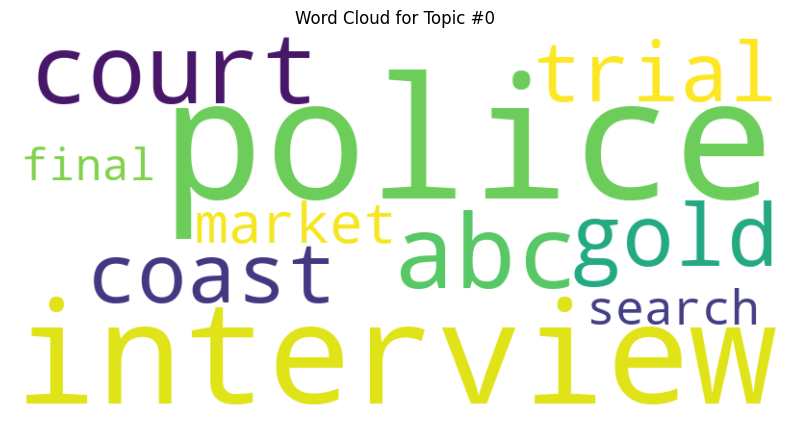

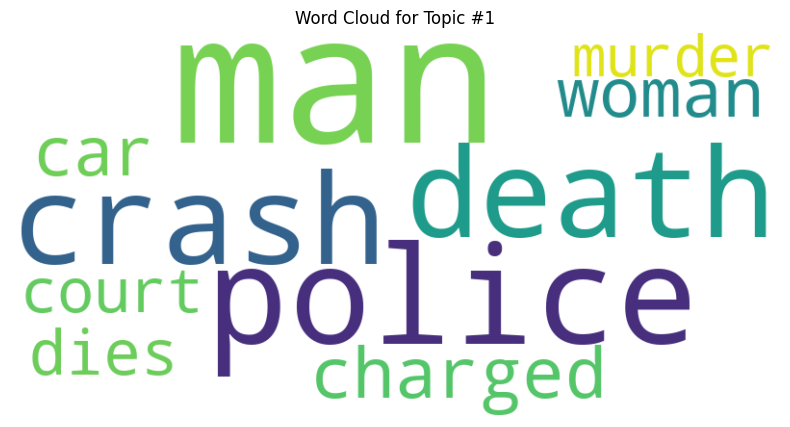

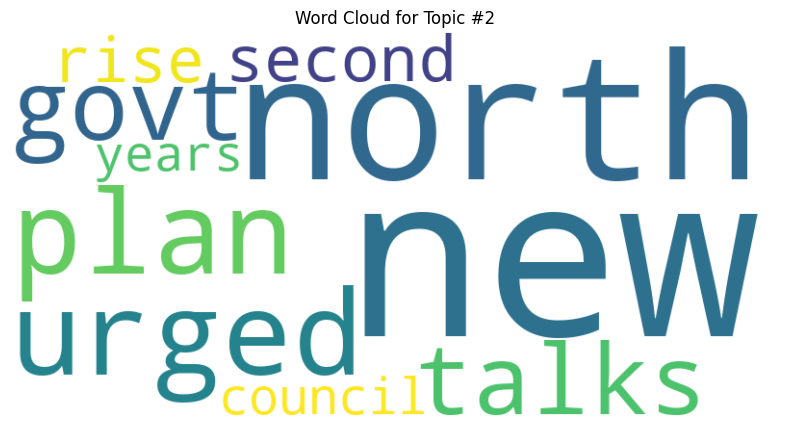

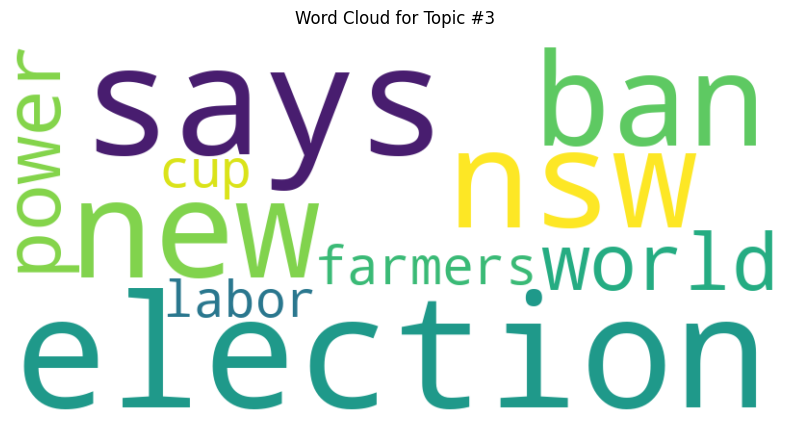

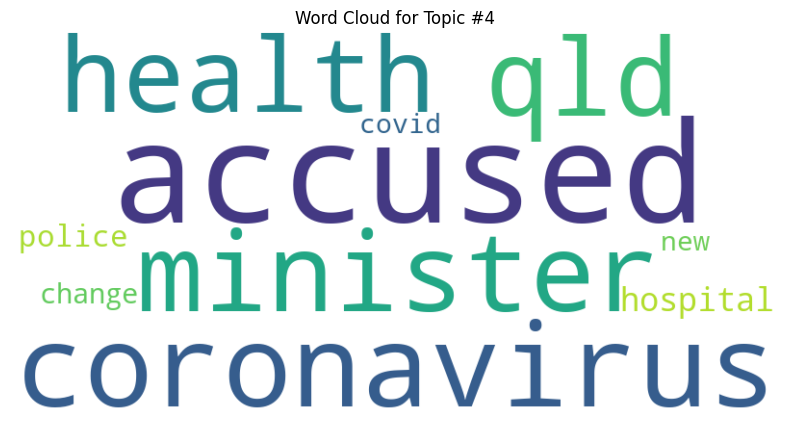

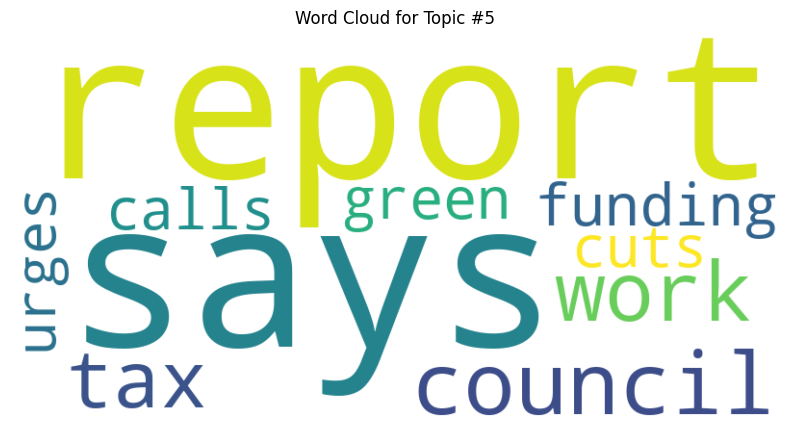

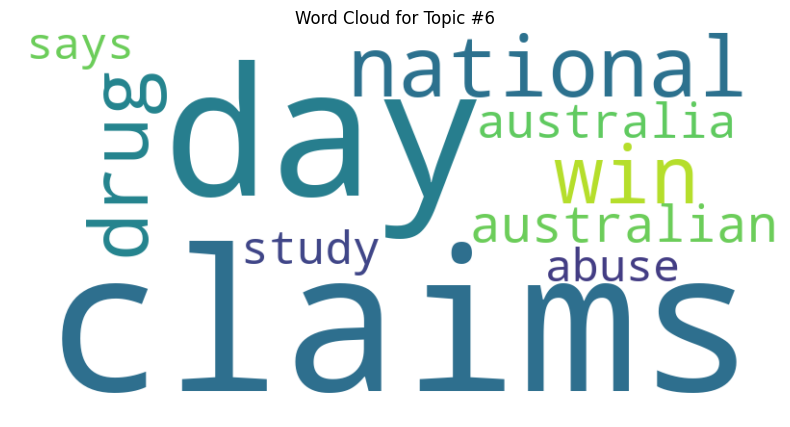

In [41]:
from wordcloud import WordCloud

# Generate Word Clouds for each topic
for i, topic in enumerate(LDA_model.components_):
    # Get the top words for the topic
    top_words = [cv.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    top_words_freq = {word: topic[cv.get_feature_names_out().tolist().index(word)] for word in top_words}
    
    # Create Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_freq)
    
    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic #{i}')
    plt.show()